In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

**TODO: Update with correct information.**

We performed 2 test experiments:
- test1 
    - CTR+ (A01)
    - CTR- (A02)
    - dilution 1:10^5 (A03)
- test2 
    - CTR+ (A01)
    - CTR- (A02)
    - CTR-scramble1 treat1 (A03)
    - CTR-scramble2 treat2 (B01)
    - hEvolvR treat1 (B02)
    - hEvolvR treat2 (B03)

## Load and normalize data

In [53]:
bc = pd.read_table("./220617/[ ID_23352 ] Arosio Big Cluster_SpikeTest3.txt")
sc = pd.read_table("./220617/[ ID_23357 ] Arosio Small Cluster_SpikeTest3.txt")
c = pd.read_table("./220617/[ ID_23356 ] Arosio Cells_SpikeTest3.txt")

print(bc.columns)
print(sc.columns)
print(c.columns)

Index(['Plate ID', 'Well Name', 'MEASUREMENT SET ID',
       'Cell: ObjectID (Arosio)', 'Cell: Big Clusters Count_Sum (Arosio)',
       'Cell: Big Clusters Area_Average (Arosio)',
       'Cell: Big Clusters Green Average Intensity_Average (Arosio)'],
      dtype='object')
Index(['Plate ID', 'Well Name', 'MEASUREMENT SET ID',
       'Cell: ObjectID (Arosio)', 'Cell: Small Clusters Count_Sum (Arosio)',
       'Cell: Small Cluster Area_Average (Arosio)',
       'Cell: Small Clusters Green Average Intensity_Average (Arosio)'],
      dtype='object')
Index(['Plate ID', 'Well Name', 'MEASUREMENT SET ID',
       'Cell: ObjectID (Arosio)', 'Cell: Cells Count_Sum (Arosio)',
       'Cell: Cells Area_Average (Arosio)',
       'Cell: Cells Green Average Intensity_Average (Arosio)'],
      dtype='object')


In [55]:
bc.head()

Plate ID Well Name  MEASUREMENT SET ID  Cell: ObjectID (Arosio)  \
0     13098       A01               23352                      1.0   
1     13098       A01               23352                      1.0   
2     13098       A01               23352                      1.0   
3     13098       A01               23352                      2.0   
4     13098       A01               23352                      1.0   

   Cell: Big Clusters Count_Sum (Arosio)  \
0                                    1.0   
1                                    1.0   
2                                    1.0   
3                                    1.0   
4                                    1.0   

   Cell: Big Clusters Area_Average (Arosio)  \
0                                    8812.0   
1                                  116821.0   
2                                   29865.0   
3                                    8945.0   
4                                   44012.0   

   Cell: Big Clusters Green Average Intensity_Average (Arosio)  
0                                         938.629333            
1                                         813.279724            
2                                         799.443054            
3                                         899.276794            
4                                         809.692810

In [56]:
def norm(df):
    try:
        df.columns = ['plate', 'well_name', 'set_id', 'object_ID', 
                      'count_sum', 'area', 'green']
        plate = list(df["plate"].unique())
        set_id = list(df["set_id"].unique())
        well_name = list(df["well_name"].unique())
        df.drop(df.columns[[0, 2]], axis=1, inplace=True)
        return plate, set_id, well_name
    except:
        raise Warning("DataFrame already normalized", )
print(norm(bc))
print(norm(sc))
print(norm(c))
bc.head()

([13098], [23352], ['A01', 'A02', 'A03', 'B01', 'B02'])
([13098], [23357], ['A01', 'A02', 'A03', 'B01', 'B02'])
([13098], [23356], ['A01', 'A02', 'A03', 'B01', 'B02'])


well_name  object_ID  count_sum      area       green
0       A01        1.0        1.0    8812.0  938.629333
1       A01        1.0        1.0  116821.0  813.279724
2       A01        1.0        1.0   29865.0  799.443054
3       A01        2.0        1.0    8945.0  899.276794
4       A01        1.0        1.0   44012.0  809.692810

## The total counts

In [100]:
nbc = bc.groupby("well_name")["area"].count()
nsc = sc.groupby("well_name")["area"].count()
nc = c.groupby("well_name")["area"].count()

pd.DataFrame(nc.rename("Single cells")).merge(nsc.rename("Small cluster"), 
                                              left_index=True, right_index=True).merge(nbc.rename("Big cluster"), left_index=True, right_index=True,)

Single cells  Small cluster  Big cluster
well_name                                          
A01               64420            267           17
A02               31713           1212            4
A03               31339            579            8
B01               35907           4291           15
B02               63666           4772           16

Ecco i risultati con il primo metodo di clusterizzazione
Ho provato ad aumentare il size cellulare da 400µm2 ad 800µm2 e di conseguenza gli small clusters sono tra 800 e 8000, con i big cluster >8000.
>Ho applicato il nuovo sizing ad entrambi gli esperimenti.


## Big clusters

<AxesSubplot:xlabel='well_name', ylabel='green'>

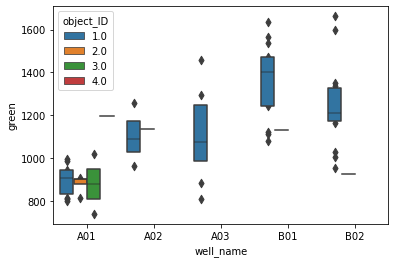

In [98]:
sb.boxenplot(y='green', 
             x='well_name', data=bc, hue='object_ID')

## Small clusters

<AxesSubplot:xlabel='well_name', ylabel='green'>

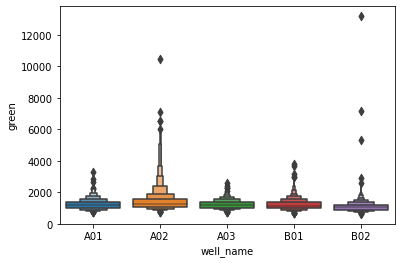

In [99]:
sb.boxenplot(y='green', x='well_name', data=sc, )

In [105]:
sc[sc["green"]>6000]

well_name  object_ID  count_sum    area         green
622         A02        3.0        1.0  3071.0   6504.530273
623         A02        4.0        1.0  2686.0   6500.688477
1186        A02        1.0        1.0  1014.0   6016.974609
1268        A02        1.0        1.0  5082.0  10465.741211
1346        A02        2.0        1.0  2547.0   7104.483887
9159        B02        7.0        1.0  1078.0  13170.574219
10156       B02        3.0        1.0   983.0   7135.930176

<AxesSubplot:xlabel='well_name', ylabel='green'>

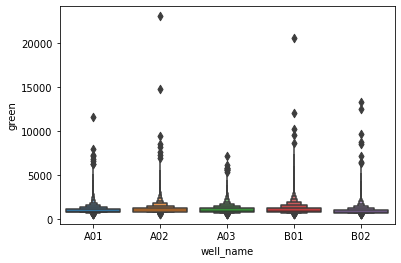

In [106]:
sb.boxenplot(y='green', 
             x='well_name', 
             data=c)

	 Big clusters


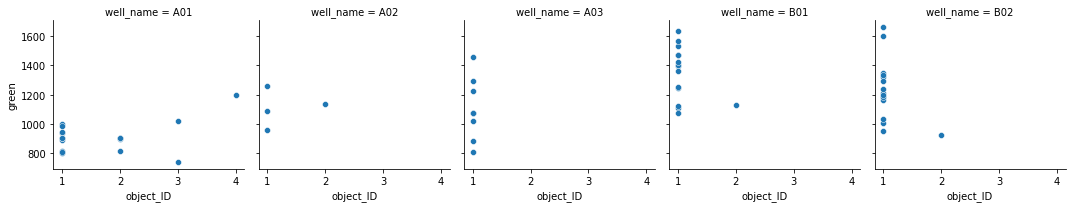

In [114]:
g = sb.FacetGrid(data=bc, col="well_name")
g.map(sb.scatterplot, 'object_ID', 'green')
print("\t Big clusters")

	 Small clusters


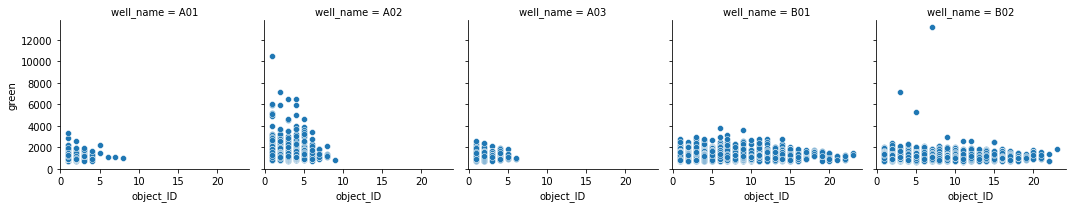

In [115]:
g = sb.FacetGrid(data=sc, col="well_name")
g.map(sb.scatterplot, 'object_ID', 'green')
print("\t Small clusters")

	 Single cells


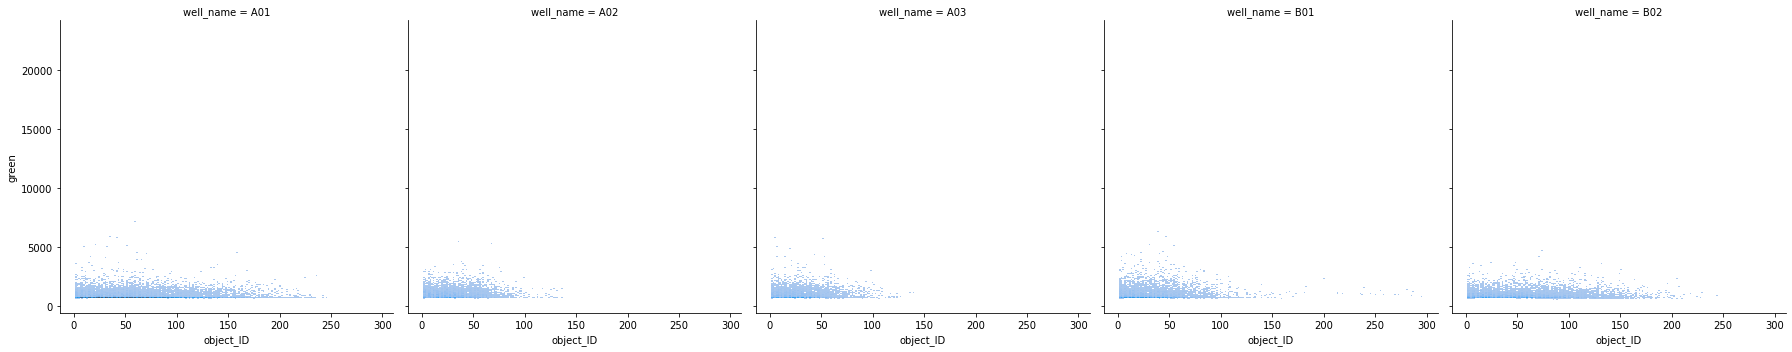

In [117]:
sb.displot(data=c, 
           col="well_name",
           x='object_ID',
           y='green')
print("\t Single cells")

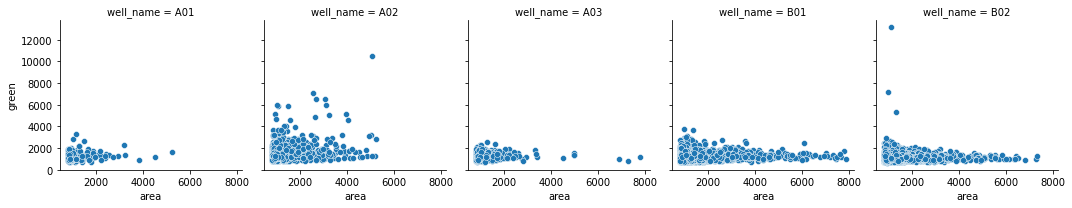

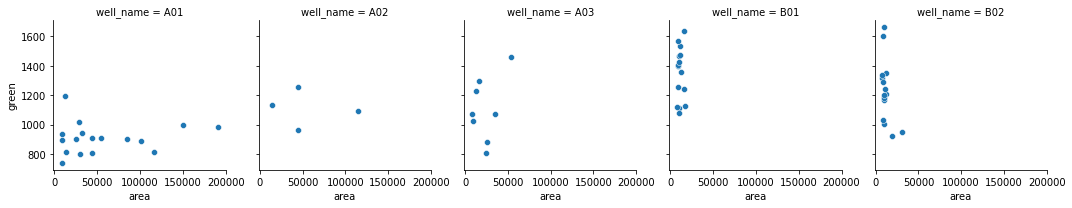

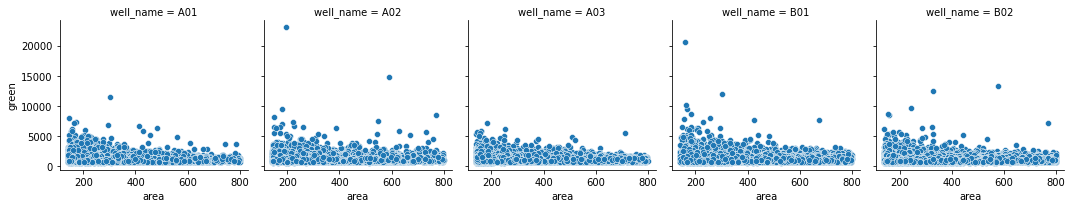

In [125]:
g = sb.FacetGrid(data=sc, col="well_name")
g.map(sb.scatterplot, 'area', 'green')

g = sb.FacetGrid(data=bc, col="well_name")
g.map(sb.scatterplot, 'area', 'green')

g = sb.FacetGrid(data=c, col="well_name")
g.map(sb.scatterplot, 'area', 'green')